# Chronos T5 


### Data For Chronos T5


In [16]:
import pandas as pd 
token = 'BTC-USD.csv'
data = pd.read_csv(token, parse_dates=['Date'], index_col=['Date'])
data.drop(['Adj Close', 'Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)


In [17]:
# Definir el número de días para el conjunto de prueba
prediction_length = 7

# Separar los datos
close_train = data['Close'][:-prediction_length]
close_test = data['Close'][-prediction_length:]
close_test


Date
2024-12-11    101173.031250
2024-12-12    100043.000000
2024-12-13    101459.257812
2024-12-14    101372.968750
2024-12-15    104298.695312
2024-12-16    106029.718750
2024-12-17    107183.734375
Name: Close, dtype: float64

### Train Chronos T5 


In [18]:
import torch
from chronos import ChronosPipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
pipeline = ChronosPipeline.from_pretrained(
    'amazon/chronos-t5-large',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length, num_samples=100)

cuda


C:\Users\Ivo\AppData\Local\Temp\ipykernel_10276\4060563894.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(close_train, dtype=torch.float32)


In [19]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([96414.2578125, 97201.3125   , 97594.8671875, 97791.6171875,
       97594.8671875, 97988.3671875, 97988.3671875])

### Graficas y Comparativa

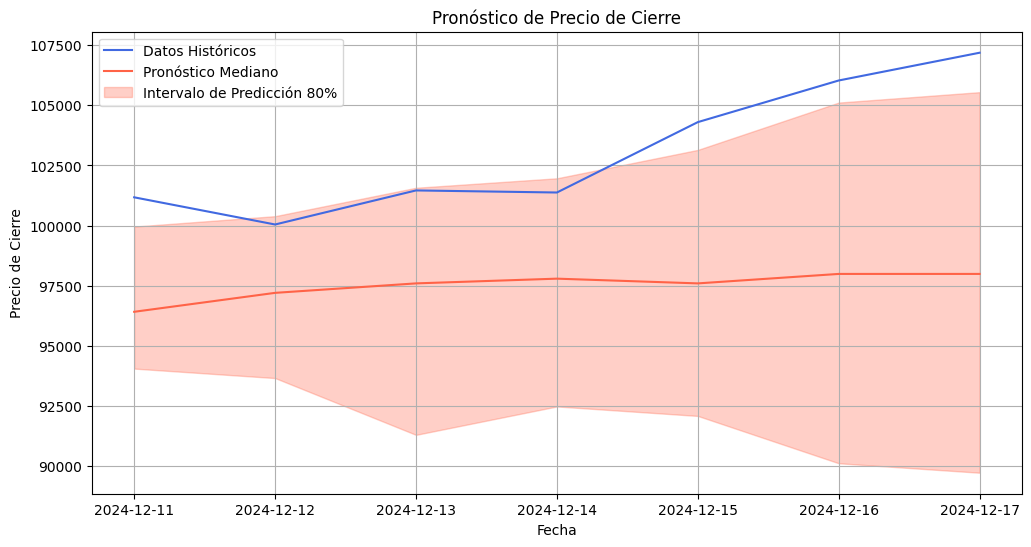

In [20]:
import matplotlib.pyplot as plt

# Graficar los datos históricos y el pronóstico junto con los datos de prueba
plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Datos Históricos', color='royalblue')
plt.plot(close_test.index, median, label='Pronóstico Mediano', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='Intervalo de Predicción 80%')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Pronóstico de Precio de Cierre')
plt.grid(True)
plt.show()


# Chronos-bolt-base

In [21]:
import torch
from chronos import BaseChronosPipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
pipeline = BaseChronosPipeline.from_pretrained(
    'amazon/chronos-bolt-base',
    device_map = device,
    torch_dtype = torch.float32
)

context = torch.tensor(close_train, dtype=torch.float32)


forecast = pipeline.predict(context, prediction_length)

cuda


C:\Users\Ivo\AppData\Local\Temp\ipykernel_10276\2797387708.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(close_train, dtype=torch.float32)


In [22]:
import numpy as np
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)
median

array([97381.9140625, 97356.0546875, 97096.75     , 97696.546875 ,
       98196.375    , 98357.265625 , 98311.109375 ])

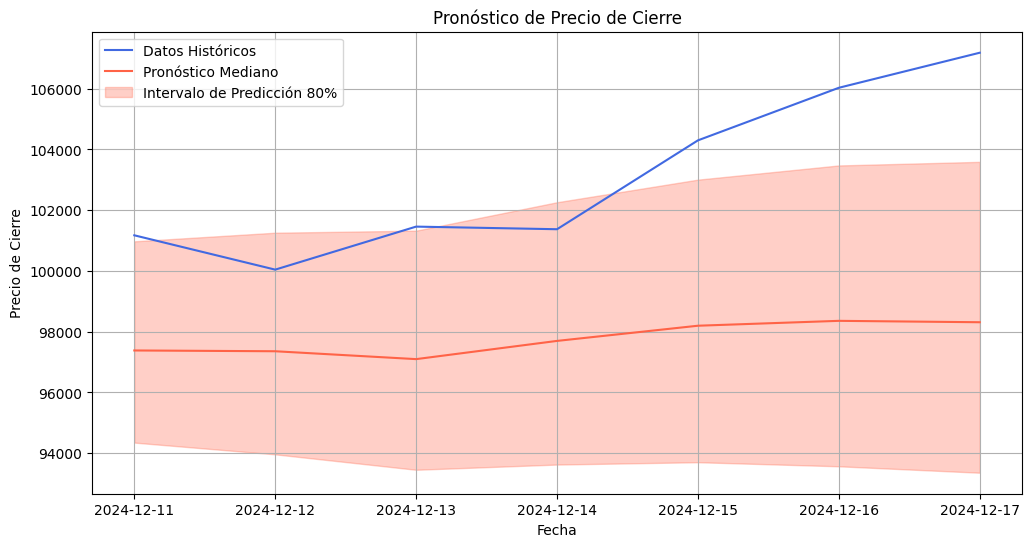

In [23]:
import matplotlib.pyplot as plt

# Graficar los datos históricos y el pronóstico junto con los datos de prueba
plt.figure(figsize=(12, 6))
plt.plot(close_test.index, close_test.values, label='Datos Históricos', color='royalblue')
plt.plot(close_test.index, median, label='Pronóstico Mediano', color='tomato')
plt.fill_between(close_test.index, low, high, color='tomato', alpha=0.3, label='Intervalo de Predicción 80%')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Pronóstico de Precio de Cierre')
plt.grid(True)
plt.show()